In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#variáveis
r0 = 2.5
Tinf = 2.9  #dias
Tinc = 5.2  #dias

#intervalo [0, 498] dias
t0 = 0
t1 = 498
n = 498

#valores iniciais
s0 = 0.999999
e0 = 0.000001
i0 = 0
rec0 = 0
y0 = [0.999999, 0.000001, 0, 0]

In [4]:
# Função com todas as equações juntas para os códigos 1 e 2

def SEIR(t, m):
    S, E, I, R = m

    dsdt = (-(r0/Tinf)*(S*I))
      
    dedt = (((r0/Tinf)*(S*I)) - ((1/Tinc)*E))
    
    didt = (((1/Tinc)*E)-((1/Tinf)*I))
    
    drdt = (1/Tinf)*I

    return([dsdt,dedt,didt,drdt])

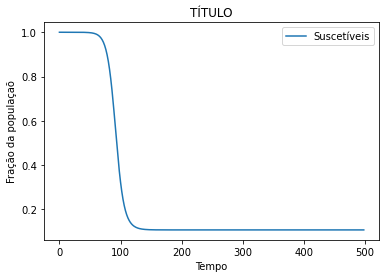

In [22]:
#código 1


def pontomedio1(a, b, f, y0, N):
    h = (b-a)/N
    y = []
    t = np.zeros(N+1)
    t[0] = a
    for i in range(0,4):
        y.append(np.zeros(N+1))  #cria 4 listas de zeros (0=S, 1=E, 2=I, 3=R)
        y[i][0] = y0[i]   #substitui o primeiro termo de cada lista pelos valores iniciais 

    for j in range(1, N+1):
        temp = []  #elementos da coluna anterior
        
        for i in range(0,4):
            temp.append(y[i][j-1])
        
        y05 = []
        
        temp2 = f(t, temp)  #f(t, y[j - 1])
        
        for p in range(0,4):
            if (len(y05) < 4):
                y05.append(temp[p] + (((h/2)*(temp2[p]))))
                
            else:                
                y05[p] = (temp[p] + ((h/2)*(temp2[p])))
            
        t[j] = (t[j-1] + (h/2))

        temp4 = f(t, y05)  #f(t, y05)

        for i in range(0,4):
            y[i][j] = temp[i] + (h*(temp4[i]))
            
        
        t[j] = t[j] + (h/2)
        
    return (t, y)

tempo1, aaa = pontomedio1(0, 498, SEIR, y0, 498)

plt.plot(tempo1, aaa[0], label='Suscetíveis')
plt.xlabel("Tempo")
plt.ylabel("Fração da populaçaõ")
plt.title("TÍTULO")
  
# Adding legend, which helps us recognize the curve according to its color
plt.legend()
  
# To load the display window
plt.show()

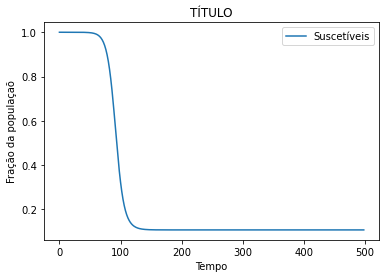

In [21]:
#código 2

def pontomedio2(a, b, f, y0, N):
    h = (b-a)/N
    y = []
    t = np.zeros(N+1)
    t[0] = a
    for i in range(0,4):
        y.append(np.zeros(N+1))
        y[i][0] = y0[i]

    for j in range(1, N+1):
        temp = [] #elementos da coluna anterior
        
        for i in range(0,4):
            temp.append(y[i][j-1])
        
        k1 = f(t, temp)
        
        t[j] = (t[j-1] + (h/2))
        
        for i in range(0,4):
            k1[i] = h * k1[i]
        
        tempmeio = [] 
        
        for i in range(0,4):
            tempmeio.append(temp[i] + ((k1[i])/2))
            
        k2 = f(t, tempmeio)
        for i in range(0,4):
            k2[i] = h * k2[i]
        
        for i in range(0,4):
            y[i][j] = y[i][j-1] + k2[i]
        
        t[j] = t[j] + (h/2)
        
    return (t, y)
        
tempo2, bbb = pontomedio2(0, 498, SEIR, y0, 498)

plt.plot(tempo2, bbb[0], label='Suscetíveis')
plt.xlabel("Tempo")
plt.ylabel("Fração da populaçaõ")
plt.title("TÍTULO")
  
# Adding legend, which helps us recognize the curve according to its color
plt.legend()
  
# To load the display window
plt.show()

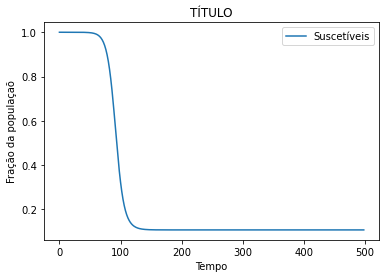

In [20]:
#código 3

################# Equações ####################
#Equação 1
def S(t, S, I):
    return (-(r0/Tinf)*(S*I))

#Equação 2
def E(t, E, I, S):
    return ((((r0/Tinf)*(S*I))- ((1/Tinc)*E)))

#Equação 3
def I(t, E, I):
    return ((((1/Tinc)*E)-((1/Tinf)*I)))

#Equação 4
def R(t, I):
    return (((1/Tinf)*I))

#####################################


def pontomedio3(a, b, S, E, I, R, y0, N):
    h = (b-a)/N
    
    ys = np.zeros(N+1)
    ye = np.zeros(N+1)
    yi = np.zeros(N+1)
    yr = np.zeros(N+1)
    
    ys[0] = y0[0]
    ye[0] = y0[1]
    yi[0] = y0[2]
    yr[0] = y0[3]

    t = np.zeros(N+1)
    t[0] = a
    
    for i in range(1,N+1):
        y05s = ys[i - 1] + (h/2)*(S(t[i-1], ys[i - 1], yi[i - 1]))
        y05e = ye[i - 1] + (h/2)*(E(t[i-1], ye[i - 1], yi[i - 1], ys[i - 1]))
        y05i = yi[i - 1] + (h/2)*(I(t[i-1], ye[i - 1], yi[i - 1]))
        y05r = yr[i - 1] + (h/2)*(R(t[i-1], yi[i - 1]))
        
        t[i] = (t[i-1] + (h/2))
        
        ys[i] = ys[i - 1] + h*(S(t[i], y05s, y05i))
        ye[i] = ye[i - 1] + h*(E(t[i], y05e, y05i, y05s))
        yi[i] = yi[i - 1] + h*(I(t[i], y05e,y05i))
        yr[i] = yr[i - 1] + h*(R(t[i], y05i))
        
        t[i] = t[i] + (h/2)
    
        
    return t, [ys, ye, yi, yr]

tempo3, ccc = pontomedio3(0, 498, S, E, I, R, y0, 498)

plt.plot(tempo3, ccc[0], label='Suscetíveis')
plt.xlabel("Tempo")
plt.ylabel("Fração da populaçaõ")
plt.title("TÍTULO")
  
# Adding legend, which helps us recognize the curve according to its color
plt.legend()
  
# To load the display window
plt.show()

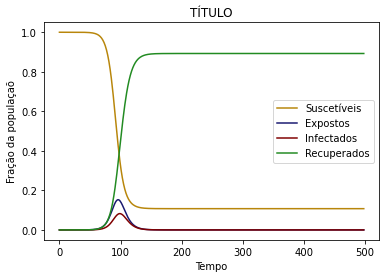

In [17]:
# Gráficos todos juntos 


# Plotting both the curves simultaneously
#para mudar as cores usar como referência: "https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_0x.png"

plt.plot(time, aaa[0], color='darkgoldenrod', label='Suscetíveis')
plt.plot(time, aaa[1], color='midnightblue', label='Expostos')
plt.plot(time, aaa[2], color='maroon', label='Infectados')
plt.plot(time, aaa[3], color='forestgreen', label='Recuperados')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Tempo")
plt.ylabel("Fração da populaçaõ")
plt.title("TÍTULO")
  
# Adding legend, which helps us recognize the curve according to its color
plt.legend()
  
# To load the display window
plt.show()

